## Super Store profit-loss classification
A superstore is a very large supermarket, often selling household goods, clothes, and electrical goods, as well as food. Superstores typically charge anywhere from 15 to 45 percent less than their smaller counterparts.

**Importing Required Modules**

In [132]:
#Data Pre.processing
import numpy as np
import pandas as pd
import re
from imblearn.over_sampling import SMOTE

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Handling Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

**Loading Data**

In [47]:
data = pd.read_csv("SampleSuperstore.csv")
data.head(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [49]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Data Pre-processing**

*Removing redundant columns*

In [50]:
data.iloc[:,2].value_counts()

United States    9994
Name: Country, dtype: int64

Entire country columns consists of same values : "United States", thus we will drop the Country column since it will not contribute much in EDA

*- Inferences:*
- Data is provided for the Super stores within the same country i.e USA

In [51]:
data.drop(columns={"Country"},inplace=True)

In [52]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

*Adding informative columns*

In [53]:
data["Status"]=np.where(data["Profit"]>0,"Profit",np.where(data["Profit"]<0,"Loss","B\E"))

In [54]:
# B\E stands for Break-Even which represents condition in which there is neither profit nor loss 
data.Status.value_counts()

Profit    8058
Loss      1871
B\E         65
Name: Status, dtype: int64

**Data Visualisation**

In [55]:
data.head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Status
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Profit
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Profit
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Loss
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Profit


In [56]:
sns.set_style("darkgrid")

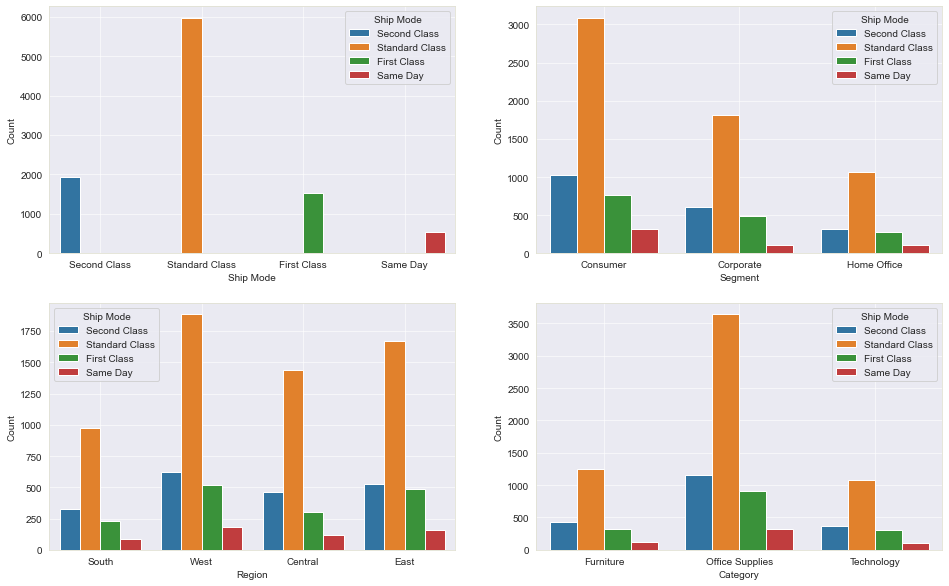

In [57]:
plt.figure(figsize=(16,10))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

attributes = ["Ship Mode","Segment","Region","Category"]
for i in range(1,len(attributes)+1):
    if attributes[i-1]=="Shipping Mode":
        plt.subplot(2,2,i)
        sns.countplot(data[attributes[i-1]])
        plt.xlabel(attributes[i-1])
    else:
        plt.subplot(2,2,i)
        sns.countplot(data[attributes[i-1]],hue=data["Ship Mode"])
        plt.xlabel(attributes[i-1])
    plt.ylabel("Count")
    plt.grid(linewidth=0.6)

*-Inference*
1. Standard class shipping mode is mostly used and same day shipping mode is used the least.
2. In each of the three segments i.e Consumer, Corporate and home office the ratio of Shipping modes used is similar where Standard class > Second class > First class > Same day , Where the Consumer segment utilizes the most and Homeoffice the least.
3. In each of the four regions i.e East, West, North, South the ratio of Shipping modes used is similar where       Standard class > Second class > First class > Same day , Where the Western region utilizes the most followed by eastern then central and then South with minimum usage.
4. In each of the three categories i.e furniture, office supplies and technology the ratio of Shipping modes used is similar where Standard class > Second class > First class > Same day , Where the office supplies utilizes the most and Technology the least.
5. We can infer that irrespective of the Region, Segment and category Standard class shipping mode is mostly used.

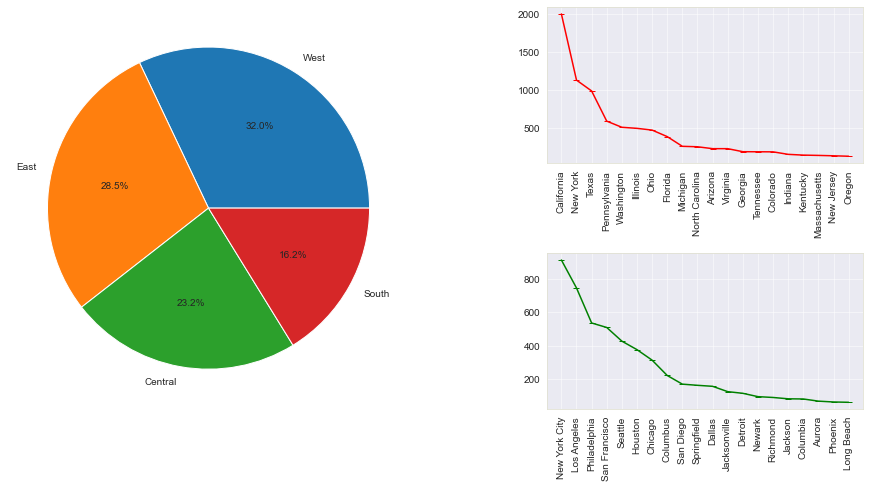

In [58]:
plt.figure(figsize=(14,7))

a1 = plt.subplot2grid((2,3),(0,0),rowspan=2, colspan=2)
sizes = list((data.Region.value_counts(normalize=True)*100).values)
label = list((data.Region.value_counts(normalize=True)*100).index)
a1.pie(sizes,labels=label,
      autopct='%1.1f%%')

a2 = plt.subplot2grid((2,3),(0,2))
a2.plot(data.State.value_counts().nlargest(20),color="r",marker="_",label=["City","Count"])
a2.grid(linewidth=0.5) 
plt.xticks(rotation=90)

a3 = plt.subplot2grid((2,3),(1,2))
a3.plot(data.City.value_counts().nlargest(20),color="g",marker="_")
a3.grid(linewidth=0.5)
plt.xticks(rotation=90)

plt.tight_layout(pad=1.5)
plt.show()

*- Inferences*
1. California state contains maximum number of Super stores followed by New York and Texas
2. New York City contains maximum number of Super stores followed by LA and Philadelphia

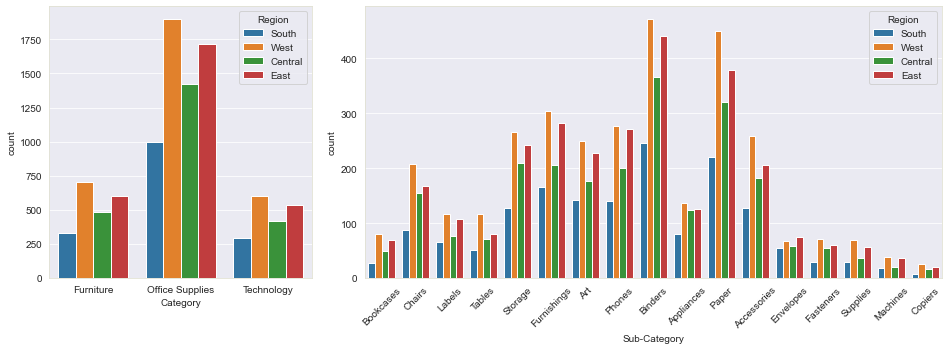

In [59]:
plt.figure(figsize=(16,5))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

x1  = plt.subplot2grid((1,3),(0,0))
x1 = sns.countplot(data["Category"],hue=data["Region"])

x2 = plt.subplot2grid((1,3),(0,1),colspan=2)
x2 = sns.countplot(data["Sub-Category"],hue=data["Region"])
plt.xticks(rotation=45)
plt.show()

*- Inferences*
1. In each of the four regions i.e East, West, North, South the ratio of categories is similar where Office Supplies Categories > Furniture > Technology > Same day , Where the Western region utilizes the most followed by eastern then central and then South with minimum usage.
2. In each of the four regions i.e East, West, North, South the ratio of Sub-categories is similar where Binders > paper > Technology > Furnishings , Where the Western region utilizes the most followed by eastern then central and then South with minimum usage.

In [60]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Status'],
      dtype='object')

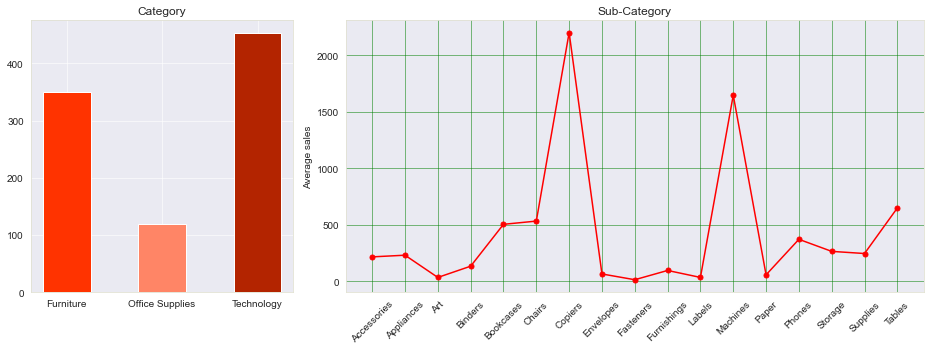

In [61]:
plt.figure(figsize=(16,5))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

x1  = plt.subplot2grid((1,3),(0,0))
x1 = plt.bar(x=data.groupby("Category")["Sales"].mean().index,
             height=data.groupby("Category")["Sales"].mean().values,
            width=0.5,color=["#ff3300","#ff8566","#b32400"])
plt.title("Category")
plt.grid(linewidth=0.6)

x2 = plt.subplot2grid((1,3),(0,1),colspan=2)
x2 = plt.plot(data.groupby("Sub-Category")["Sales"].mean(),marker="o",ms=5,color="r",mfc="r")
plt.xticks(rotation=45)
plt.title("Sub-Category")
plt.grid(linewidth=0.5,color="g")
plt.ylabel("Average sales")
plt.show()

*-Infernces*:
1. Average sales of products belonging to tech categories is highest followed by Furniture and Office Supplies
2. Average sales of products belonging to sub-category copiers is highest followed by machines and tables
3. Average sales of Art, Fasteners and labels is the lowest and same 

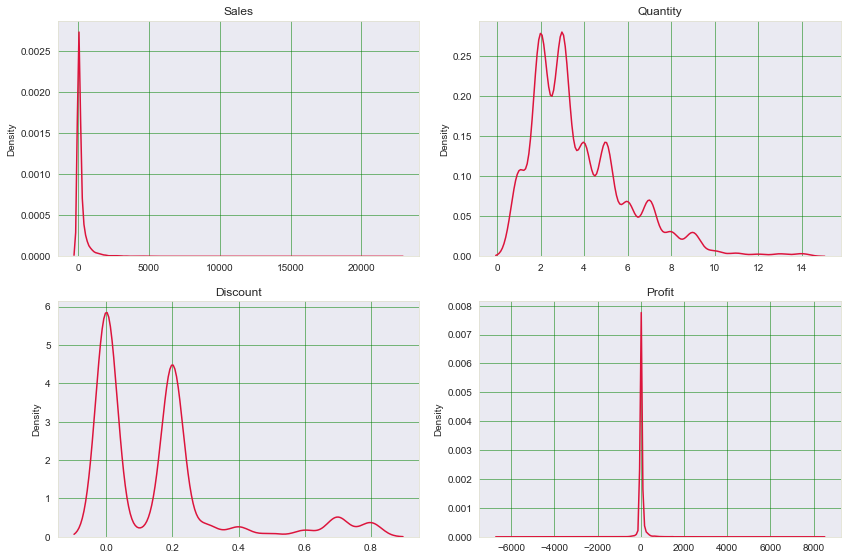

In [62]:
plt.figure(figsize=(12,8))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

x = data.loc[:,"Sales":"Profit"].columns
for i in range(1,len(x)+1):
    plt.subplot(2,2,i)
    sns.kdeplot(data[x[i-1]],color="crimson")
    plt.xlabel(None)
    plt.title(x[i-1])
    plt.grid(linewidth=0.5,color="g")
plt.tight_layout(pad=1.5)

*-Inferences*
1. Sales of products generally lie between 0 to 500
2. Profit gained generally lie between 2 to 4
3. Discount is generally 0% followed by 20% and then 70-75%
4. Profit from 0 to 500 and even loss from 0 to 500

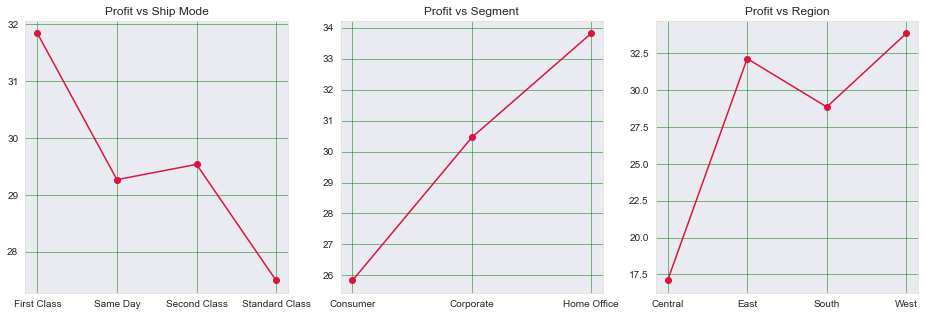

In [63]:
plt.figure(figsize=(16,5))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

attributes = ["Ship Mode","Segment","Region"]
for i in range(1,len(attributes)+1):
    plt.subplot(1,3,i)
    plt.plot(data.groupby(attributes[i-1])["Profit"].mean().index,
             data.groupby(attributes[i-1])["Profit"].mean().values,
             color="crimson",marker="o")
    plt.title(f"Profit vs {attributes[i-1]}")
    plt.grid(linewidth=0.5,color="g")

*-Inferences*
1. First class shipping mode has maximum profit followed by Second class then Same day and Standard class at the last, reason can be excessive use of standard shipping mode causing the average value of profit to lower down and vice versa for first class shipping mode
2. Home office segment has maximum profit followed by Corporate and then Consumer
3. Western region has maximum profit followed by Eastern and then Southern and then Central with lowest profit

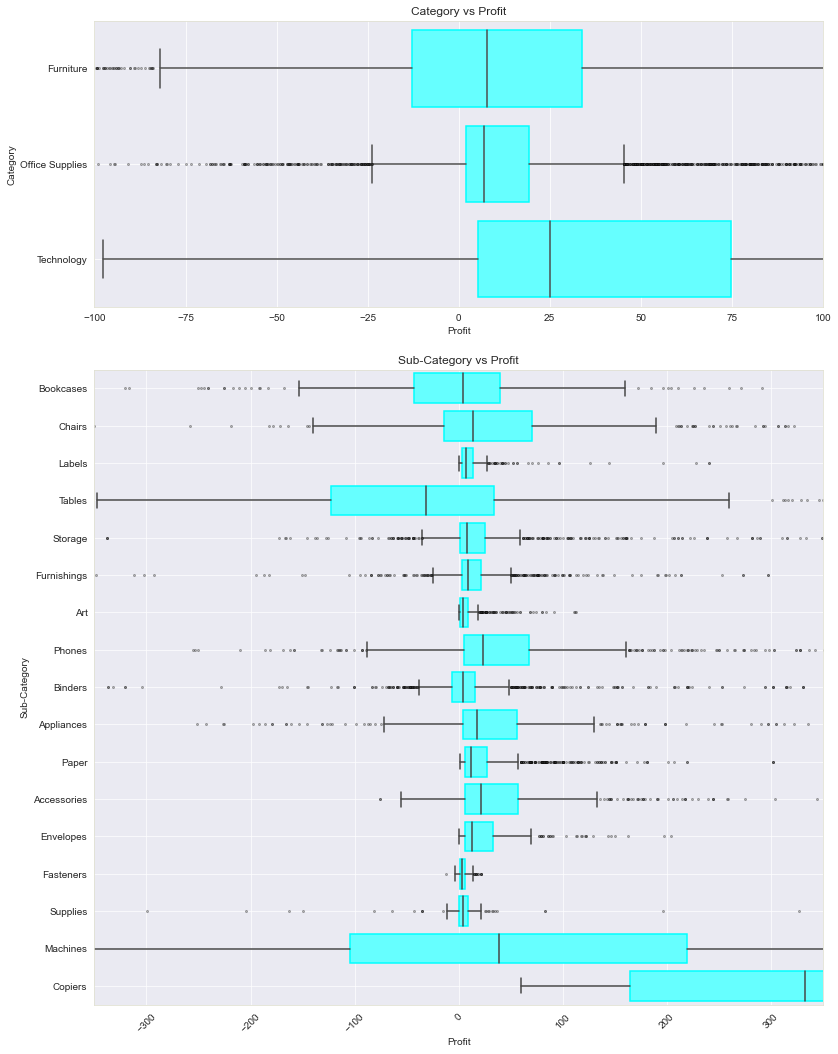

In [83]:
plt.figure(figsize=(12,15))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', alpha=0.3)

a1 = plt.subplot2grid((3,1),(0,0))
a1 = sns.boxplot(data["Profit"],data["Category"],
            color="r",flierprops=flierprops,
           boxprops={'facecolor': '#66ffff',
                      'edgecolor': '#00ffff'})
plt.title("Category vs Profit")
plt.xlim((-100,100))
plt.grid(linewidth=0.8)

a2 = plt.subplot2grid((3,1),(1,0),rowspan=2)
a2 = sns.boxplot(data["Profit"],data["Sub-Category"],
            flierprops=flierprops,
            boxprops={'facecolor': '#66ffff',
                      'edgecolor': '#00ffff'})
plt.title("Sub-Category vs Profit")
plt.xticks(rotation=45)
plt.xlim((-350,350))
plt.grid(linewidth=0.7)
plt.tight_layout(pad=2)
plt.show()

*-Inferences*
1. Average profit is highest for technology category of product followed by Furniture and then offlice supplies
2. Products belonging to category technology and offlice supplies are always profitable whereas furniture is'nt
3. Table is the only sub-category under furniture which is in loss by average.
4. Machines are most profitable

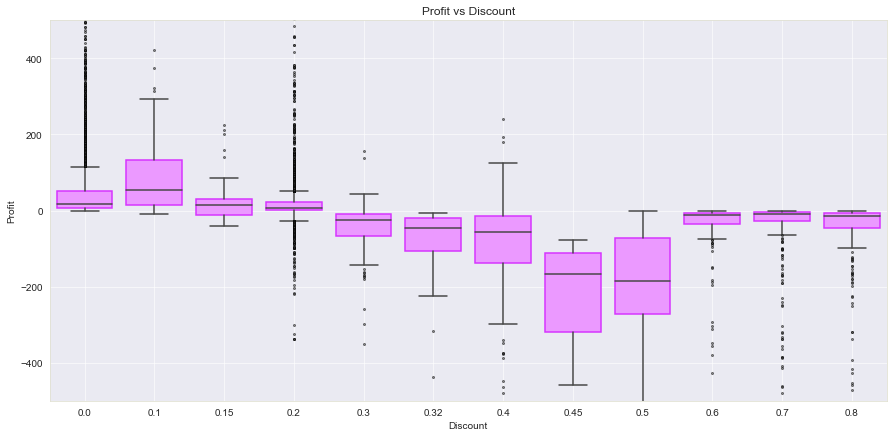

In [65]:
plt.figure(figsize=(15,7))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', alpha=0.5)

sns.boxplot(data["Discount"],data["Profit"],
            flierprops=flierprops,
            boxprops={'facecolor': '#eb99ff',
                      'edgecolor': '#d633ff'})
plt.title("Profit vs Discount")
plt.ylim((-500,500))
plt.grid(linewidth=0.6)

- Inferences;
1. Superstores are in profit if the discount lies between 0% to 20% and in loss if the discount is over 20%
2. Average profit and loss is maximum when discount is 10% and 50% respectively
3. Reason might be superstores not providing larger discounts

**Classification**

<u>Dataset Transformation</u>

- Dropping the Profit column

In [90]:
data.drop(columns={"Profit"},inplace=True)

In [91]:
df = data.copy()
df.head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Status
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,Profit
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,Profit
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,Loss
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,Profit


<u>Features and Labels</u>

- Extracting features and labels from given data

In [92]:
#Features
X = df.drop(columns={"Status"})
#Labels
y = df["Status"]

<u>Data Transformation</u>

- Scaling continious data 

Scaling the data by setting pipline for consisting of robust scaler and standard scaler

In [107]:
preprocessing_pipeline = Pipeline([
    ("robust_scaler",RobustScaler()),
    ("std_scaler",StandardScaler())
])
to_be_processed = X.select_dtypes(include=["float64","int64"]).drop(columns={"Postal Code"})
X[list(to_be_processed.columns)] = preprocessing_pipeline.fit_transform(to_be_processed)
X.head(3)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,0.051511,-0.804303,-0.756643
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,0.805634,-0.354865,-0.756643
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,-0.345368,-0.804303,-0.756643


- Encoding categorical data to numeric data

In [108]:
le = LabelEncoder()
for col in X.select_dtypes(include="O").columns:
    X[col]=le.fit_transform(X[col])
X.head(3)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,2,0,194,15,42420,2,0,4,0.051511,-0.804303,-0.756643
1,2,0,194,15,42420,2,0,5,0.805634,-0.354865,-0.756643
2,2,1,266,3,90036,3,1,10,-0.345368,-0.804303,-0.756643


<u> Data Balancing </u>
- Balancing the dataset , as you can see the classes are highly imbalanced

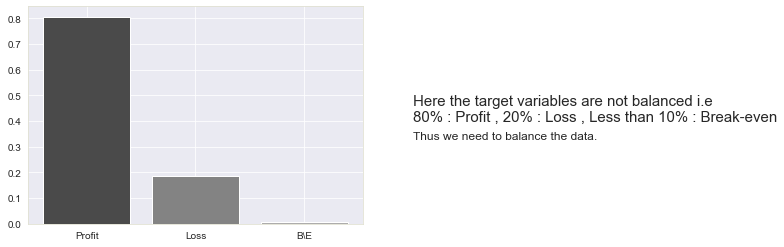

In [109]:
plt.bar(y.value_counts(normalize=True).index,
        y.value_counts(normalize=True).values,
       color=["#4A4A4A","#838383","#ADACAC"])
plt.text(3,0.4,"Here the target variables are not balanced i.e \n80% : Profit , 20% : Loss , Less than 10% : Break-even",
        fontsize=15)
plt.text(3,0.33,"Thus we need to balance the data.",
        fontsize=12)
plt.show()

In [110]:
sm = SMOTE(random_state=10)
X_res,y_res = sm.fit_resample(X,y)

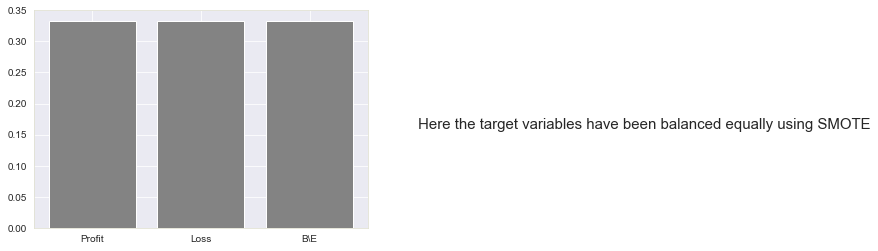

In [111]:
plt.bar(y_res.value_counts(normalize=True).index,
        y_res.value_counts(normalize=True).values,
       color=["#838383","#838383","#838383"])
plt.text(3,0.16,"Here the target variables have been balanced equally using SMOTE",
        fontsize=15)
plt.show()

<u>Splitting Data</u>
- Splitting the data into training data and testing data

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,shuffle=True,random_state=10)

<u> Model Selection </u>
- Selecting classification model 

*KNN Model*

In [113]:
x = KNeighborsClassifier()
knn_param_grid = {"n_neighbors":range(2,20),
                 "metric":["manhattan","euclidean","cosine"]}
gs = GridSearchCV(x,param_grid=knn_param_grid,cv=5)
gs.fit(X_train,y_train)
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 2}

In [114]:
knn_model = gs.best_estimator_

*SVM Model*

In [115]:
# x = SVC()
# svm_param_grid = {"C":range(1,20,5),
#                   "kernel":["rbf","linear","poly","sigmoid"]}
# gs = GridSearchCV(x,param_grid=svm_param_grid,cv=5)
# gs.fit(X_train,y_train)
# gs.best_params_

In [116]:
# svm_model = gs.best_estimator_

Reason : SVM taking too much time 

*Logistic Regression Model*

In [117]:
x = LogisticRegression()
lr_param_grid = {"solver":['newton-cg','sag','saga','lbfgs']}
gs = GridSearchCV(x,param_grid=lr_param_grid,cv=5)
gs.fit(X_train,y_train)
gs.best_params_

{'solver': 'newton-cg'}

In [118]:
lr_model = gs.best_estimator_

*Random Forest Model*

In [119]:
x = RandomForestClassifier()
rf_param_grid = {"criterion":["entropy","gini"],
                "max_depth":[3,None],"max_features":range(2,10,2),
                "n_estimators":[100]}
gs = GridSearchCV(x,param_grid=rf_param_grid,cv=5)
gs.fit(X_train,y_train)
gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'n_estimators': 100}

In [120]:
rf_model = gs.best_estimator_

*Gradient Boosting Model*

In [121]:
x = GradientBoostingClassifier()
gb_param_grid = {"learning_rate": range(1,3),
                "max_depth":[1,2,3,None],"max_features":range(2,10,2),
                 "n_estimators":[100]}
gs = GridSearchCV(x,param_grid=gb_param_grid,cv=5)
gs.fit(X_train,y_train)
gs.best_params_

{'learning_rate': 1, 'max_depth': None, 'max_features': 4, 'n_estimators': 100}

In [122]:
gb_model = gs.best_estimator_

*Voting Classifier*

Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

In [133]:
estimator = []
classifiers,models = ["KNN","LR","RF","GB"],[knn_model,lr_model,rf_model,gb_model] 
for i,j in zip(classifiers,models):
    estimator.append((i,j))
estimator

[('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=2)),
 ('LR', LogisticRegression(solver='newton-cg')),
 ('RF', RandomForestClassifier(max_features=2)),
 ('GB',
  GradientBoostingClassifier(learning_rate=1, max_depth=None, max_features=4))]

In [134]:
model = VotingClassifier(estimators=estimator,voting="hard")
model

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=2)),
                             ('LR', LogisticRegression(solver='newton-cg')),
                             ('RF', RandomForestClassifier(max_features=2)),
                             ('GB',
                              GradientBoostingClassifier(learning_rate=1,
                                                         max_depth=None,
                                                         max_features=4))])

<u> Model Validation </u>

- Applying Stratified KFold

In [135]:
str_kfold = StratifiedKFold(n_splits=6,shuffle=True,random_state=11)

In [136]:
scores = []
for train_index,test_index in str_kfold.split(X_res,y_res):
    X_train,X_test = X_res.iloc[train_index,:],X_res.iloc[test_index,:]
    y_train,y_test = y_res.iloc[train_index],y_res.iloc[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    scores.append(accuracy_score(y_test,pred_values))

In [144]:
pd.DataFrame({"Split number":range(1,7),"Scores":scores})

,Split number,Scores
0,1,0.967734
1,2,0.965748
2,3,0.969720
3,4,0.961777
4,5,0.968727
5,6,0.960288


In [145]:
print("Model Score : ",np.array(scores).mean())

Model Score :  0.9656655911309672


<u>Feature selection</u>
- Checking model score before and after selecting 4 to 11 best features
- Best parameters for max features for random forest classifier and gradient boost classifier are 2, 4 respectively
- Thus we can not select features less than 4

In [146]:
estimator #From previous voting classifier

[('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=2)),
 ('LR', LogisticRegression(solver='newton-cg')),
 ('RF', RandomForestClassifier(max_features=2)),
 ('GB',
  GradientBoostingClassifier(learning_rate=1, max_depth=None, max_features=4))]

In [147]:
test_scores,train_scores = [],[]
for i in range(4,len(X.columns)+1):
    X_new = SelectKBest(f_classif, k=i).fit_transform(X_res, y_res)
    X_train,X_test,y_train,y_test = train_test_split(X_new,y_res,test_size=0.3,shuffle=True,random_state=10)
    estimator = estimator
    vot = VotingClassifier(estimators=estimator,voting="hard").fit(X_train,y_train)
    train_scores.append(vot.score(X_train,y_train))
    test_scores.append(vot.score(X_test,y_test))

In [167]:
feature_selection = pd.DataFrame({
    "Total Features":range(4,len(X.columns)+1),
    "Train Score":train_scores,
    "Test Score":test_scores,
    "Feature Selection":["Yes"]*8
})
feature_selection.loc[(feature_selection["Total Features"]==11),"Feature Selection"]="No"
feature_selection.nlargest(8,columns=["Train Score","Test Score"])

,Total Features,Train Score,Test Score,Feature Selection
7,11,0.991372,0.959603,No
6,10,0.988003,0.956294,Yes
5,9,0.986998,0.953536,Yes
4,8,0.984516,0.944023,Yes
3,7,0.983453,0.935337,Yes
2,6,0.979670,0.919344,Yes
1,5,0.908161,0.901972,Yes
0,4,0.815909,0.805046,Yes


- As you can see, model performs better without feature selection,thus there is no need for feature selection